In [1]:
#######DB instance identifier - database-1
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import re
import numpy as np
import ktrain
from ktrain import text




C:\Users\Mario Hage\DS Springboard\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
sql50 = '''use wsb'''
cursor.execute(sql50)

0

In [3]:
#### Example Date Extraction - df = pd.read_sql("SELECT * FROM wallstreetbets WHERE comment_date >= '2021-01-21 06:00:00' and comment_date <= '2021-01-21 06:23:39'", con=engine)



In [4]:
df = pd.read_sql("SELECT * FROM wallstreetbets WHERE comment_date >= '2021-01-25 09:00:00' and comment_date <= '2021-01-25 20:00:00'", con=engine)



In [5]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 100)



print(df)



       comment_id comment_parent_id  \
0       gkpgpj7    t1_gkpgo9f         
1       gkpgpjt    t1_gkpg7rk         
2       gkpgpkg    t1_gkpg5dk         
3       gkpgpkn    t3_l4lmrx          
4       gkpgpkt    t3_l4lmrx          
...         ...          ...          
268900  gkr7463    t3_l4xje1          
268901  gkr7466    t1_gkr6mry         
268902  gkr746x    t1_gkr6gk0         
268903  gkr7476    t1_gkr4j4e         
268904  gkr747d    t1_gkr7132         

                                                                                                                                                                                                                                                                    comment_body  \
0       These are rookie numbers                                                                                                                                                                                                                               

In [6]:
stock_symbols = ['aapl', 'googl', 'nflx', 'msft', 'nok', 'tsla', 'bb', 'nok', 'posh','amc', 'psth', 'srne', 'cldr', 'baba', 'sq', 'qs', 'penn', 'spy', 'uber', 'dash', 'abnb', 'snow', 'pltr', 'xpev', 'nio', 
'wmt', 'zm', 'mgm', 'nvda', 'dks', 'gld', 'rkt', 'pfe', 'intc', 'spce', 'etsy', 'dis', 'roku', 'lyft', 'twtr', 'fsly', 'amzn', 'fb', 'gpro', 'amd',
'mu', 'bac', 'gme', 'snap', 'aal', 'ual', 'crm', 'shop', 'tgt', 'plug', 'acb', 'mrna', 'nclh', 'sbux', 'nkla', 'rcl', 'jblu', 'arkk', 'tlry', 'icln']
 

def matcher(x):
    for i in stock_symbols:
        if i.lower() in x.lower():
            return i.upper()
    else:
        return np.nan

df['ticker'] = df['comment_body'].apply(matcher)

testingsample = df.comment_body.head(50)

testingsample.to_csv(r'testsample.txt', header=None, index=None, sep=' ', mode='a')

In [7]:
df = df.dropna()
df['hour'] = df['comment_date'].dt.hour



df2 = df.groupby(['ticker','hour'], as_index=False).comment_body.count()

df3 = df2.sort_values(by=['hour', 'comment_body'], ascending=[True, False])

df3.rename(columns = {'comment_body': 'comment_count'}, inplace = True)
df3.set_index('ticker')

df3.reset_index()


,index,ticker,hour,comment_count
0,74,BB,9,1801
1,118,GME,9,1417
2,325,SQ,9,565
3,170,MU,9,553
4,66,BAC,9,522
...,...,...,...,...
384,26,ACB,16,1
385,86,CRM,16,1
386,242,POSH,16,1
387,285,SBUX,16,1


In [8]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()


In [9]:
tickers = ['aapl', 'googl', 'nflx', 'msft', 'nok', 'tsla', 'bb', 'nok', 'posh','amc', 'psth', 'srne', 'cldr', 'baba', 'sq', 'qs', 'penn', 'spy', 'uber', 'dash', 'abnb', 'snow', 'li', 'pltr', 'xpev', 'nio', 
'wmt', 'zm', 'mgm', 'nvda', 'dks', 'gld', 'rkt', 'pfe', 'intc', 'spce', 'etsy', 'dis', 'roku', 'lyft', 'twtr', 'fsly', 'amzn', 'fb', 'gpro', 'amd',
'mu', 'bac', 'gme', 'snap', 'aal', 'ual', 'crm', 'shop', 'tgt', 'plug', 'acb', 'mrna', 'nclh', 'sbux', 'nkla', 'rcl', 'jblu', 'arkk', 'tlry', 'icln']

dataset = yf.download(tickers, start="2021-01-25", end="2021-01-26", interval="60m")

dataset.columns

[*********************100%***********************]  65 of 65 completed


MultiIndex([('Adj Close',  'AAL'),
            ('Adj Close', 'AAPL'),
            ('Adj Close', 'ABNB'),
            ('Adj Close',  'ACB'),
            ('Adj Close',  'AMC'),
            ('Adj Close',  'AMD'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'ARKK'),
            ('Adj Close', 'BABA'),
            ('Adj Close',  'BAC'),
            ...
            (   'Volume', 'SRNE'),
            (   'Volume',  'TGT'),
            (   'Volume', 'TLRY'),
            (   'Volume', 'TSLA'),
            (   'Volume', 'TWTR'),
            (   'Volume',  'UAL'),
            (   'Volume', 'UBER'),
            (   'Volume',  'WMT'),
            (   'Volume', 'XPEV'),
            (   'Volume',   'ZM')],
           length=390)

### Price Data

In [10]:
dataset10 = dataset.unstack(level='Datetime')


dataset10.index.names = ['Description','ticker', 'date']

df50 = pd.DataFrame(dataset10)

df51 = df50.rename(columns={0: "price"})

df52 = df51.reset_index()



df52['hour'] = df52['date'].dt.hour

df53 = df52[df52['Description'] == 'Adj Close']

df54 = df53.drop(columns=['Description', 'date'])

display(df54)

,ticker,price,hour
0,AAL,15.430000,9
1,AAL,15.180000,10
2,AAL,15.230000,11
3,AAL,15.369900,12
4,AAL,15.370100,13
...,...,...,...
450,ZM,386.619995,11
451,ZM,392.179993,12
452,ZM,392.000000,13
453,ZM,386.769989,14


In [11]:

tickersmerged = df3.merge(df54, how='left', on=['hour', 'ticker'])

tickersmergedsorted = tickersmerged.sort_values('comment_count', ascending=False)


display(tickersmergedsorted)

,ticker,hour,comment_count,price
48,BB,10,2612,18.240000
100,BB,11,2576,17.131100
151,GME,12,2339,69.319901
152,BB,12,2237,16.548500
101,GME,11,2096,72.709999
...,...,...,...,...
189,ETSY,12,1,210.395004
190,LYFT,12,1,46.459999
191,MRNA,12,1,142.720001
192,NFLX,12,1,558.054993


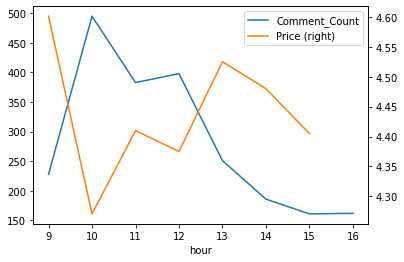

In [12]:
def plotticker(stockticker):

    new = tickersmergedsorted[tickersmergedsorted['ticker'] == stockticker]



    new1 = new.set_index('hour')
    new1 = new1.sort_values('hour', ascending=False)
    new1.comment_count.plot(label="Comment_Count", legend=True)
    new1.price.plot(secondary_y=True, label="Price", legend=True)


plotticker('AMC')

### Volume Data

In [13]:
dataset20 = dataset.unstack(level='Datetime')


dataset20.index.names = ['Description','ticker', 'date']

df500 = pd.DataFrame(dataset10)

df501 = df500.rename(columns={0: "Volume"})

df502 = df501.reset_index()



df502['hour'] = df502['date'].dt.hour

df503 = df502[df502['Description'] == 'Volume']

df504 = df503.drop(columns=['Description', 'date'])

tickersmerged1 = df3.merge(df504, how='left', on=['hour', 'ticker'])

tickersmergedsorted1 = tickersmerged1.sort_values('comment_count', ascending=False)

tickersmergedsorted1.columns



Index(['ticker', 'hour', 'comment_count', 'Volume'], dtype='object')

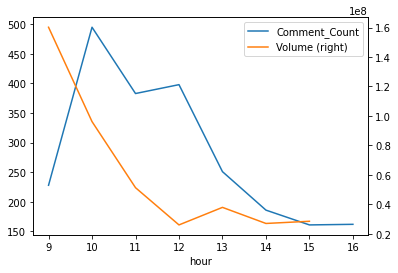

In [14]:
def plottickervolume(stockticker):

    new5 = tickersmergedsorted1[tickersmergedsorted['ticker'] == stockticker]



    new6 = new5.set_index('hour')
    new6 = new6.sort_values('hour', ascending=False)
    new6.comment_count.plot(label="Comment_Count", legend=True)
    new6.Volume.plot(secondary_y=True, label="Volume", legend=True)


plottickervolume('AMC')

In [15]:
##from transformers import BertTokenizer, BertModel
###tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
###model = BertModel.from_pretrained("bert-base-uncased")

In [16]:
from transformers import InputExample, InputFeatures


In [17]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert", num_labels=3)



In [18]:
from transformers import pipeline
nlp = pipeline("sentiment-analysis", model='ProsusAI/finbert')

In [19]:
print(nlp("AAPL will close at 390+ EOD"))

[{'label': 'neutral', 'score': 0.9413979649543762}]


In [20]:
dfsample = df.head(50)


dfsample['Sentiment'] = nlp([i for i in dfsample['comment_body']])

<ipython-input-20-46a85376ed91>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsample['Sentiment'] = nlp([i for i in dfsample['comment_body']])


In [21]:
display(dfsample.sample(50))

,comment_id,comment_parent_id,comment_body,comment_link_id,comment_score,comment_date,ticker,hour,Sentiment
22,gkpgpsk,t1_gkpgc0v,Why is it up so much premarket?,t3_l4lopq,1,2021-01-25 09:00:03,MU,9,"{'label': 'neutral', 'score': 0.7055037021636963}"
11,gkpgpnh,t1_gkpgne3,U must be a liberal,t3_l4lmrx,1,2021-01-25 09:00:01,MU,9,"{'label': 'neutral', 'score': 0.8742456436157227}"
80,gkpgqia,t1_gkpgexf,"I sold CCIV to improve my position on GME, hopefully the merge with Lucid is announced so you make bank",t3_l4lopq,1,2021-01-25 09:00:15,GME,9,"{'label': 'neutral', 'score': 0.600437581539154}"
166,gkpgru4,t1_gkpfrh6,I put in an order for bb calls but ik they're not gonna fill,t3_l4lopq,1,2021-01-25 09:00:36,BB,9,"{'label': 'neutral', 'score': 0.846107006072998}"
70,gkpgqbr,t3_l4meah,Bbby to the moon!,t3_l4meah,1,2021-01-25 09:00:12,BB,9,"{'label': 'neutral', 'score': 0.8750547766685486}"
150,gkpgrja,t3_l4njoy,"I paper handed at 68 after the halt. Bought back in at 58 and my limit sell hit this morning, LOL. Buying again on the dip at open",t3_l4njoy,1,2021-01-25 09:00:32,BAC,9,"{'label': 'positive', 'score': 0.789677619934082}"
213,gkpgsh2,t1_gkpgs5x,###[View link](https://redditsave.com/info?url=/r/wallstreetbets/comments/l4h5u7/yes_another_gme_meme/)\n\n\n --- \n [**Info**](https://np.reddit.com/user/SaveVideo/comments/jv323v/info/)&#32;|&#32; [**Feedback**](https://np.reddit.com/message/compose/?to=Kryptonh&subject=Feedback for savevideo)&#32;|&#32;[**Donate**](https://ko-fi.com/getvideo) &#32;|&#32; [**DMCA**](https://np.reddit.com/message/compose/?to=Kryptonh&subject=Content removal request for savevideo&message=https://np.reddit.com//r/wallstreetbets/comments/l4h5u7/yes_another_gme_meme/),t3_l4h5u7,1,2021-01-25 09:00:47,BAC,9,"{'label': 'neutral', 'score': 0.8106429576873779}"
222,gkpgskb,t3_l4lmrx,"91% GME, 9% ICLN\n\nGuess who’s doing some rebalancing at open?",t3_l4lmrx,1,2021-01-25 09:00:49,GME,9,"{'label': 'neutral', 'score': 0.923014760017395}"
197,gkpgs9y,t1_gkpg2nb,"My guess it's gamma squeeze.. MM have until Tuesday to settle all ITM calls exercised on Friday, which as we know is all of them.",t3_l4lmrx,1,2021-01-25 09:00:44,SQ,9,"{'label': 'neutral', 'score': 0.586073100566864}"
146,gkpgrg7,t1_gkp3mql,"Also, if you sold shares to fund buying GME shares it could be a securities violation to sell GME shares - you need to wait for the initial sale to settle.\n\n>Liquidations resulting from unsettled trades\n\n>This violation occurs when you buy a security in a cash account using sales proceeds that haven't yet settled. Then you sell the recently purchased security before the settlement of the initial sale.\n\nhttps://investor.vanguard.com/investing/online-trading/trading-penalties",t3_l4lmrx,1,2021-01-25 09:00:30,GME,9,"{'label': 'negative', 'score': 0.6755859851837158}"


In [24]:
df['Sentiment'] = nlp([i for i in df['comment_body']], truncation='True')

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:73] data. DefaultCPUAllocator: not enough memory: you tried to allocate 451246894080 bytes. Buy new RAM!

In [ ]:
display(df.sample(50))